<a href="https://colab.research.google.com/github/ckwei379/titanic-analysis/blob/main/%E5%B0%88%E9%A1%8C%E5%AF%A6%E4%BD%9C_01%EF%BC%9A%E9%90%B5%E9%81%94%E5%B0%BC%E8%99%9F%E5%AD%98%E6%B4%BB%E9%A0%90%E6%B8%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

專題實作 #01：鐵達尼號存活預測

環境準備

In [1]:
import pandas as pd
import numpy as np

In [20]:
# 載入 Titanic 資料集的 `train.csv` 資料集
df = pd.read_csv('https://raw.githubusercontent.com/dsindy/kaggle-titanic/master/data/train.csv')

# 找出具有缺失值的欄位
missing_values = df.isnull().sum()
missing_columns = missing_values[missing_values > 0]
print(missing_columns)
print()

# 資料清理
df["Age"] = df["Age"].fillna(df["Age"].mean())
df["Cabin"] = df["Cabin"].fillna(0)
df["Embarked"] = df["Embarked"].fillna(0)
print(df.head())
print()

# 確認資料清理後是否尚有缺失值
has_missing = df.isna().values.any()
print("DataFrame has missing values：", has_missing)

Age         177
Cabin       687
Embarked      2
dtype: int64

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500     0        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250     0        S  
3      0            113803  53.1000  C123     

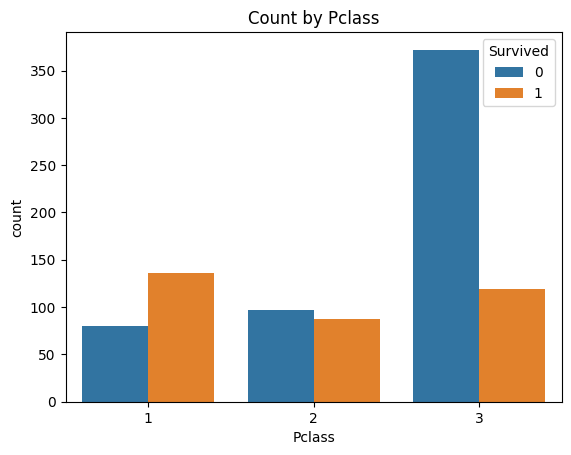

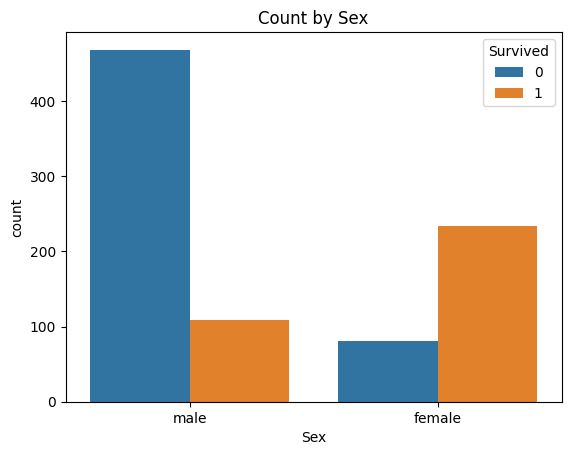

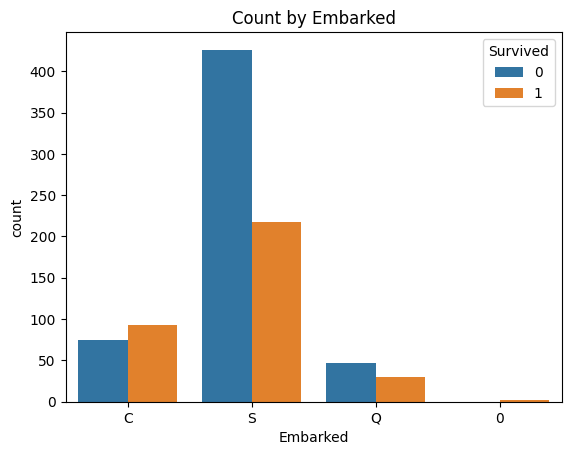

Correlation Matrix：
               Age      Fare  Survived
Age       1.000000  0.091566 -0.069809
Fare      0.091566  1.000000  0.257307
Survived -0.069809  0.257307  1.000000


In [55]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(x="Pclass", hue="Survived", data=df)
plt.title("Count by Pclass")
plt.show()

import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(x="Sex", hue="Survived", data=df)
plt.title("Count by Sex")
plt.show()

import seaborn as sns
import matplotlib.pyplot as plt
df = df[df["Embarked"] != "0"]
sns.countplot(x="Embarked", hue="Survived", data=df)
plt.title("Count by Embarked")
plt.show()

correlation = df[["Age", "Fare", "Survived"]].corr()
print("Correlation Matrix：")
print(correlation)